In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
training_dict = np.load("py3_training_dict.npy").item()

In [3]:
training_dict.keys()

dict_keys(['training_x', 'training_regress', 'training_class'])

In [4]:
training_x = training_dict['training_x']
training_regress = training_dict['training_regress']
training_class = training_dict['training_class']

In [5]:
mask = np.isnan(training_regress)

In [6]:
X = np.array(training_x)[~mask]
y = np.array(training_regress)[~mask]

In [8]:
test_X = np.expand_dims(X ,axis = 3)
tensor_X = tf.convert_to_tensor(test_X)

In [26]:
tensor_X

<tf.Tensor 'Const_2:0' shape=(778, 32, 32, 1) dtype=float64>

In [15]:
angle_round = np.round(angle)

In [18]:
angle_round = angle_round.astype(int)

In [28]:
tensor_y = tf.convert_to_tensor(y)

In [24]:
tensor_X = tf.convert_to_tensor(test_X)

In [29]:
tensor_y

<tf.Tensor 'Const_3:0' shape=(778,) dtype=float64>

In [10]:
degree_y = np.rad2deg(y)

In [17]:
degree_y = np.expand_dims(y, axis=1)

In [12]:
degree_y.shape

(778, 1)

In [18]:
degree_y

array([[3.85973490e+00],
       [2.36650340e+00],
       [2.33029355e+00],
       [2.38809855e+00],
       [6.24497549e-01],
       [2.39063597e+00],
       [2.50564051e+00],
       [2.14436694e+00],
       [3.63746643e+00],
       [9.69840527e-01],
       [2.62777662e+00],
       [1.99365025e+00],
       [3.53459835e+00],
       [2.37173728e+00],
       [2.33997970e+00],
       [2.73706102e+00],
       [2.36672042e+00],
       [2.29618692e+00],
       [2.43133974e+00],
       [3.85343953e+00],
       [2.54813147e+00],
       [2.19318628e+00],
       [1.12825060e+00],
       [1.89984602e+00],
       [2.58943966e+00],
       [3.65673494e+00],
       [2.81501122e+00],
       [2.73517847e+00],
       [1.93136233e+00],
       [1.98337507e+00],
       [2.73314142e+00],
       [2.36318827e+00],
       [2.36353350e+00],
       [2.19260931e+00],
       [2.50662374e+00],
       [2.30357599e+00],
       [3.85607170e+00],
       [1.93024111e+00],
       [2.04814171e+00],
       [1.81203669e+00],


In [19]:
def cnn_model_fn(features, labels , mode):
    #input_layer = tf.reshape(X, [-1,32,32,1])
    #initializer = tf.variance_scaling_initializer(scale = 2.0)
    input_layer = tf.reshape(features["x"],[-1,32,32,1])
    out = tf.layers.conv2d(inputs = input_layer, filters= 32, kernel_size= [5,5], padding='same',\
                            activation=tf.nn.relu)
    #out = tf.layers.max_pooling2d(out, 2, 2, "same")
    out = tf.layers.conv2d(inputs = out, filters = 64, kernel_size = [3,3], \
                            padding = 'same', activation = tf.nn.relu)
    out = tf.layers.max_pooling2d(inputs = out, pool_size=[2,2],strides=2)
    out = tf.layers.dropout(inputs = out, rate = 0.25)
    out = tf.layers.flatten(inputs = out)
    out = tf.layers.dense(inputs = out, units= 128)
    out = tf.layers.dropout(inputs = out, rate = 0.25)
    out = tf.layers.dense(inputs = out, units = 64)
    pred_angle = tf.layers.dense(inputs = out, units = 1)
    
    predictions = {
        "angle": tf.identity(pred_angle,"angle_tensor")
    }
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode = mode, predictions = predictions)
    
    loss = tf.losses.mean_squared_error(labels = labels, predictions = pred_angle)
    
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
        train_op = optimizer.minimize(loss = loss, 
                                     global_step = tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode = mode, loss = loss, train_op = train_op)
    
    eval_metric_ops = {
        "mean_absolute_error": tf.metrics.mean_absolute_error(labels= labels, predictions= pred_angle)
    }
    

In [22]:
def train_model():
    angle_regressor = tf.estimator.Estimator(model_fn=cnn_model_fn, model_dir= "/home/zhejun/Neural_Networks/particle_orientation_training_build/regress_test")
    tensors_to_log = {"angle": "angle_tensor"}
    logging_hook = tf.train.LoggingTensorHook(tensors= tensors_to_log, every_n_iter= 50)
    train_input_fn = tf.estimator.inputs.numpy_input_fn(
        x = {"x": test_X},
        y = degree_y,
        batch_size= 50,
        num_epochs= None,
        shuffle= True
    )
    angle_regressor.train(
        input_fn=train_input_fn,
        steps = 1000,
        hooks=[logging_hook]
    )
    

In [23]:
train_model()

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/home/zhejun/Neural_Networks/particle_orientation_training_build/regress_test', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f63c421beb8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:te

INFO:tensorflow:loss = 0.45269632, step = 2400 (2.417 sec)
INFO:tensorflow:angle = [[ 1.36561565]
 [-0.2782953 ]
 [ 4.08958319]
 [ 5.2118306 ]
 [ 1.68262751]
 [-0.02443397]
 [ 2.5393688 ]
 [ 5.19825739]
 [ 3.60831409]
 [ 1.62785582]
 [ 1.39264913]
 [ 1.89881017]
 [ 4.59823931]
 [ 4.95757406]
 [ 4.59614353]
 [ 4.76592072]
 [ 3.73794645]
 [ 0.26408745]
 [ 3.48819154]
 [ 2.04136622]
 [ 1.75412078]
 [ 3.48347942]
 [ 5.07244236]
 [ 1.03560738]
 [ 1.4082077 ]
 [ 1.61931457]
 [ 4.27926886]
 [ 5.71407099]
 [ 4.16402468]
 [ 2.91758764]
 [ 4.89533313]
 [ 4.6966541 ]
 [ 4.18074426]
 [ 0.31422655]
 [ 0.84086119]
 [ 5.079726  ]
 [ 5.37054405]
 [ 2.81617173]
 [ 2.81339773]
 [ 1.62266256]
 [ 6.04634945]
 [ 4.8787561 ]
 [ 0.59302818]
 [ 3.99246318]
 [ 2.70174296]
 [ 1.23541891]
 [ 5.75382474]
 [ 4.55159521]
 [ 4.13773345]
 [ 1.62785582]] (1.270 sec)
INFO:tensorflow:global_step/sec: 40.7988
INFO:tensorflow:angle = [[ 3.40628795]
 [ 4.32613985]
 [ 1.96904559]
 [-0.1934479 ]
 [ 4.18333588]
 [ 2.25649217]

INFO:tensorflow:loss = 0.43011945, step = 2900 (2.414 sec)
INFO:tensorflow:angle = [[1.94366822]
 [1.80411227]
 [4.12656924]
 [1.81071506]
 [1.2144997 ]
 [1.97853806]
 [0.33454903]
 [3.71378006]
 [1.95836806]
 [1.73505418]
 [3.68622839]
 [3.84278075]
 [4.00028088]
 [5.7769202 ]
 [2.25902505]
 [0.73708689]
 [1.84427776]
 [6.64920425]
 [3.26745621]
 [5.93112546]
 [2.82573045]
 [4.23513224]
 [6.06722785]
 [5.75223923]
 [1.30654524]
 [4.59108866]
 [2.76836102]
 [3.34459849]
 [2.04061241]
 [4.18979198]
 [5.0927347 ]
 [1.94366822]
 [0.80732891]
 [5.22144753]
 [5.19800904]
 [3.54771751]
 [2.40211118]
 [4.32592318]
 [2.7468109 ]
 [5.05505843]
 [2.98711276]
 [3.28730124]
 [5.13857515]
 [1.74188718]
 [5.45886412]
 [3.18342431]
 [2.82573045]
 [0.60003887]
 [3.72309245]
 [3.01947978]] (1.213 sec)
INFO:tensorflow:global_step/sec: 41.3746
INFO:tensorflow:angle = [[1.49908126]
 [2.1336198 ]
 [2.96923011]
 [4.0639926 ]
 [3.40580443]
 [1.06427066]
 [1.712727  ]
 [2.65654146]
 [1.56529426]
 [3.87375549]

INFO:tensorflow:angle = [[ 0.40804012]
 [ 0.78820951]
 [ 1.46512222]
 [ 0.95656315]
 [ 4.15741527]
 [ 2.02861341]
 [ 0.90214616]
 [ 4.72952736]
 [ 1.64831257]
 [ 5.89497659]
 [ 2.91863748]
 [ 0.71249009]
 [ 2.78959681]
 [ 1.95987561]
 [ 2.52456289]
 [ 2.00373448]
 [ 3.502095  ]
 [ 3.27008488]
 [ 3.34394163]
 [ 3.63284919]
 [ 5.3329231 ]
 [ 2.99795259]
 [ 2.40902363]
 [ 3.46155063]
 [ 5.14241529]
 [ 1.57132344]
 [ 4.03187546]
 [ 2.38200846]
 [ 1.60482095]
 [ 3.42499754]
 [ 2.47896474]
 [ 2.28907139]
 [ 2.04602304]
 [ 1.40500634]
 [-0.33148364]
 [ 2.25968286]
 [ 2.585857  ]
 [ 0.56848503]
 [ 1.1783906 ]
 [ 0.28038333]
 [ 1.95692582]
 [ 1.17673736]
 [-0.43442674]
 [ 2.41916577]
 [ 5.32912003]
 [ 4.04418104]
 [ 2.81570359]
 [ 2.59176928]
 [ 5.65768005]
 [ 3.55908938]] (1.195 sec)
INFO:tensorflow:global_step/sec: 41.0494
INFO:tensorflow:angle = [[6.07393758]
 [2.57206051]
 [5.08031126]
 [3.34514667]
 [1.43607077]
 [6.02895075]
 [3.02305868]
 [1.07792341]
 [3.24731321]
 [4.26767419]
 [3.8405

INFO:tensorflow:loss = 0.3767574, step = 3900 (2.471 sec)
INFO:tensorflow:angle = [[0.15495856]
 [1.94150263]
 [5.45021067]
 [5.00739008]
 [1.96594733]
 [3.90607127]
 [2.62416131]
 [3.69266331]
 [3.40946635]
 [2.0604588 ]
 [4.65473733]
 [4.77795059]
 [1.88350962]
 [0.80542012]
 [1.21485802]
 [2.17515614]
 [2.57048805]
 [1.68173419]
 [2.29953089]
 [3.52142368]
 [0.79903182]
 [3.17239286]
 [4.02311763]
 [5.43975944]
 [5.31432017]
 [3.579249  ]
 [3.67481009]
 [3.85488954]
 [1.21485802]
 [4.38452154]
 [2.06251702]
 [3.02231818]
 [2.16591894]
 [2.36069005]
 [1.12391193]
 [3.72127633]
 [5.60648564]
 [2.9865985 ]
 [2.23873002]
 [4.56139983]
 [5.30308225]
 [2.0604588 ]
 [5.69744348]
 [3.16597312]
 [5.91494436]
 [4.2825004 ]
 [1.5642012 ]
 [4.31168936]
 [2.46735584]
 [5.68578856]] (1.189 sec)
INFO:tensorflow:global_step/sec: 40.994
INFO:tensorflow:angle = [[0.98122575]
 [2.09354166]
 [3.41807358]
 [3.8410971 ]
 [4.23757797]
 [1.29465597]
 [1.69956371]
 [5.16632586]
 [0.86291059]
 [1.64633849]
 

INFO:tensorflow:angle = [[1.67737656]
 [0.92236597]
 [6.01342531]
 [4.32109999]
 [5.08255811]
 [3.65293431]
 [2.38166847]
 [5.72745382]
 [3.52220681]
 [0.60174721]
 [4.89230959]
 [4.7840834 ]
 [5.44830551]
 [1.4010496 ]
 [2.36501686]
 [1.03764995]
 [3.63847932]
 [0.87669692]
 [0.59014729]
 [5.64360053]
 [5.09243443]
 [2.50851452]
 [3.87200038]
 [3.82396555]
 [1.97180392]
 [5.67903837]
 [1.58435621]
 [5.29205761]
 [2.62368329]
 [6.62526434]
 [3.3559274 ]
 [5.39811047]
 [1.91725676]
 [5.59814164]
 [1.10522663]
 [1.53063134]
 [4.79307031]
 [1.38832344]
 [2.51866277]
 [0.99629081]
 [1.03978318]
 [0.82414937]
 [1.52462929]
 [4.4011684 ]
 [3.08739906]
 [1.66690993]
 [3.08739442]
 [6.48357156]
 [1.62808262]
 [4.8867131 ]] (1.206 sec)
INFO:tensorflow:global_step/sec: 40.7129
INFO:tensorflow:angle = [[ 0.83357126]
 [ 3.63742211]
 [ 3.45990348]
 [ 2.49613553]
 [ 3.60634597]
 [ 3.96212546]
 [ 4.70335029]
 [ 5.19524169]
 [ 1.26865706]
 [ 5.22811209]
 [ 4.86092357]
 [ 4.60301903]
 [ 2.82802245]
 [ 

INFO:tensorflow:loss = 0.13788107, step = 4900 (2.456 sec)
INFO:tensorflow:angle = [[0.46342425]
 [3.85454173]
 [3.18986609]
 [1.61859392]
 [5.32059334]
 [4.83280948]
 [2.43082547]
 [1.2456291 ]
 [3.23847422]
 [2.44463232]
 [0.75844228]
 [5.25780834]
 [6.30683534]
 [1.09487138]
 [3.58853847]
 [1.53475652]
 [0.6375739 ]
 [3.64249604]
 [5.83458584]
 [5.00579274]
 [5.01439322]
 [1.44438708]
 [1.2456291 ]
 [2.56016299]
 [3.27281878]
 [4.53853173]
 [3.21978433]
 [0.55879936]
 [5.71329871]
 [1.61859392]
 [4.58523103]
 [0.77593379]
 [2.14111356]
 [0.60959588]
 [3.63946813]
 [1.05258301]
 [0.37546334]
 [4.19488121]
 [5.81893783]
 [3.64019741]
 [5.77298218]
 [2.772243  ]
 [1.80354878]
 [3.51660146]
 [6.01614156]
 [4.64665574]
 [6.12815542]
 [6.24649019]
 [4.4992564 ]
 [0.89658541]] (1.226 sec)
INFO:tensorflow:global_step/sec: 40.4892
INFO:tensorflow:angle = [[ 2.31174916]
 [ 3.07905863]
 [ 3.54009164]
 [ 1.3795775 ]
 [ 2.53023283]
 [ 4.78871049]
 [ 1.72534315]
 [ 4.02023392]
 [ 5.85562724]
 [ 0

INFO:tensorflow:global_step/sec: 40.5129
INFO:tensorflow:angle = [[ 2.07005352]
 [ 1.04875197]
 [ 3.67566507]
 [-0.19235842]
 [ 0.55155363]
 [ 3.72491478]
 [ 0.58583117]
 [ 0.67772505]
 [ 0.28205403]
 [ 0.38636155]
 [ 4.06213333]
 [ 4.74627371]
 [ 0.74223202]
 [ 3.62739618]
 [ 3.35362369]
 [ 2.227974  ]
 [ 1.7163506 ]
 [ 4.70106709]
 [ 5.49442217]
 [ 0.77133574]
 [ 0.10002202]
 [-0.74641357]
 [ 0.83231943]
 [ 0.17246027]
 [ 2.9258743 ]
 [ 0.67737904]
 [ 5.3314876 ]
 [ 4.49552223]
 [ 3.91847218]
 [ 1.50526107]
 [ 1.81021907]
 [ 3.80204327]
 [ 3.09490241]
 [ 4.54109292]
 [ 0.67772505]
 [ 4.70131746]
 [ 5.47419528]
 [ 0.28340289]
 [-0.36687829]
 [ 3.61968994]
 [ 0.68553012]
 [ 1.36989997]
 [ 1.76425167]
 [ 2.26307604]
 [ 4.81499166]
 [ 5.47419528]
 [ 2.25089585]
 [ 3.07656978]
 [ 2.019436  ]
 [ 1.06229893]] (1.217 sec)
INFO:tensorflow:loss = 0.26171547, step = 5500 (2.468 sec)
INFO:tensorflow:angle = [[5.70544044]
 [0.59241098]
 [5.77126179]
 [4.05636682]
 [3.71743371]
 [2.42764021]
 [0.3

INFO:tensorflow:angle = [[ 4.90906576]
 [ 4.90774313]
 [ 6.02744899]
 [ 1.72110137]
 [ 2.47417199]
 [ 4.92062145]
 [ 1.78006607]
 [ 3.14634586]
 [-0.04686959]
 [ 2.33572567]
 [ 1.55169017]
 [ 2.69623459]
 [ 1.84076845]
 [ 1.36078849]
 [ 2.66359482]
 [ 3.24455424]
 [ 1.56411705]
 [ 5.43263867]
 [ 3.06931548]
 [ 1.74251182]
 [ 1.28680019]
 [ 5.49213416]
 [ 0.13121586]
 [ 2.42903599]
 [ 0.82823321]
 [ 0.0660319 ]
 [ 4.38112449]
 [ 2.96796732]
 [ 5.5040446 ]
 [ 2.59758687]
 [ 4.11196568]
 [-0.31367114]
 [ 1.33853948]
 [ 0.2636127 ]
 [ 0.54131135]
 [ 4.18101922]
 [ 2.14137904]
 [ 2.47148634]
 [ 5.81822121]
 [ 1.73583569]
 [ 2.11120128]
 [ 1.08316748]
 [ 4.92062145]
 [ 2.59758687]
 [ 5.23360124]
 [ 4.65822211]
 [ 5.15042538]
 [ 3.94341508]
 [ 0.75803058]
 [ 4.78164214]] (1.218 sec)
INFO:tensorflow:loss = 0.23519725, step = 6000 (2.476 sec)
INFO:tensorflow:angle = [[ 4.68315345]
 [ 2.35596999]
 [ 3.13921365]
 [ 5.91254129]
 [ 0.53341498]
 [ 1.02952225]
 [-0.19539577]
 [ 5.87818239]
 [ 4.28388

INFO:tensorflow:loss = 0.10014568, step = 6500 (2.461 sec)
INFO:tensorflow:angle = [[1.96594884]
 [5.5810763 ]
 [3.9089306 ]
 [3.82528606]
 [3.70312476]
 [2.48813781]
 [4.8795881 ]
 [0.42048968]
 [0.94776034]
 [2.42712271]
 [1.75932574]
 [4.92912289]
 [1.15848137]
 [3.56708748]
 [5.40214203]
 [4.91900076]
 [1.52662255]
 [2.99656378]
 [3.91147005]
 [1.35040968]
 [0.34921182]
 [2.66666   ]
 [3.32347921]
 [2.14496491]
 [4.0199241 ]
 [2.32147944]
 [0.82715183]
 [4.6457672 ]
 [1.81582695]
 [5.34524118]
 [3.52388482]
 [3.9089306 ]
 [1.31481785]
 [1.84953177]
 [4.68021932]
 [1.46748371]
 [3.80639157]
 [0.69598914]
 [3.76868789]
 [0.68048201]
 [0.51276625]
 [2.96269153]
 [4.85417736]
 [1.83678317]
 [0.82018923]
 [0.34921182]
 [3.19483197]
 [1.27222285]
 [1.87178923]
 [2.60744972]] (1.254 sec)
INFO:tensorflow:global_step/sec: 40.0873
INFO:tensorflow:angle = [[5.55730409]
 [1.14040003]
 [4.96574893]
 [1.14091638]
 [5.60088663]
 [2.19646613]
 [1.41694952]
 [5.2564493 ]
 [5.16838696]
 [0.75522869]

INFO:tensorflow:global_step/sec: 40.2062
INFO:tensorflow:angle = [[ 5.31872403]
 [ 5.9415003 ]
 [ 1.65056013]
 [-0.05777259]
 [ 0.16734801]
 [ 2.8813671 ]
 [ 0.97190577]
 [ 1.78989272]
 [-0.01543491]
 [ 1.78006039]
 [ 0.49225634]
 [ 0.90845792]
 [-0.66672793]
 [ 0.4332991 ]
 [ 0.33376692]
 [ 3.57517214]
 [ 0.9925945 ]
 [ 0.39154191]
 [ 4.02709209]
 [ 3.26283744]
 [ 4.45230673]
 [ 3.58492881]
 [ 1.68585248]
 [ 0.30113877]
 [ 0.09084425]
 [ 5.03471293]
 [ 4.52117709]
 [ 3.01150812]
 [ 0.52855592]
 [ 2.92174224]
 [ 3.04113719]
 [ 1.21648103]
 [ 0.60390608]
 [ 5.62028115]
 [ 3.10933563]
 [ 5.5105373 ]
 [ 5.2487808 ]
 [ 4.40146362]
 [ 0.23348364]
 [-0.11323881]
 [ 4.60478899]
 [ 1.05014311]
 [ 2.09564964]
 [ 2.65890012]
 [ 5.29159422]
 [ 4.71005101]
 [ 4.46444836]
 [ 0.08196389]
 [ 3.82715869]
 [ 3.89358453]] (1.228 sec)
INFO:tensorflow:loss = 0.18432067, step = 7100 (2.487 sec)
INFO:tensorflow:angle = [[ 1.14085098]
 [ 1.2705234 ]
 [ 0.33616289]
 [ 0.52255513]
 [ 0.09672382]
 [ 5.49276646]

INFO:tensorflow:global_step/sec: 40.4088
INFO:tensorflow:angle = [[-0.14417267]
 [ 0.16999127]
 [ 3.89095662]
 [ 4.29256194]
 [ 4.00589228]
 [ 4.59925373]
 [ 0.33066387]
 [ 4.68714698]
 [ 4.27709975]
 [ 4.91137151]
 [ 5.59234871]
 [ 2.1169866 ]
 [ 3.73836454]
 [ 3.88386841]
 [ 1.02831706]
 [-0.15255162]
 [ 0.98492749]
 [ 0.98410267]
 [ 0.0877271 ]
 [ 0.74177184]
 [ 3.09226822]
 [ 2.90292718]
 [ 4.70224451]
 [-0.18900681]
 [ 2.82091578]
 [ 0.76719235]
 [ 0.87189601]
 [ 5.7089851 ]
 [ 2.83560392]
 [ 3.90256652]
 [ 2.33235343]
 [ 5.47712838]
 [ 1.86165797]
 [ 2.37845925]
 [-0.65741436]
 [ 4.91137151]
 [-0.0102034 ]
 [ 2.41401244]
 [ 0.79288914]
 [ 4.07950393]
 [ 1.77428269]
 [ 4.3642244 ]
 [ 1.68379675]
 [-0.12048334]
 [ 2.65635189]
 [ 1.40674844]
 [ 3.36237394]
 [ 1.99009704]
 [ 3.45518821]
 [ 2.17820672]] (1.216 sec)
INFO:tensorflow:loss = 0.44719437, step = 7600 (2.474 sec)
INFO:tensorflow:angle = [[3.66678204]
 [2.09878635]
 [1.86141833]
 [1.56796066]
 [3.51165599]
 [6.15065354]
 [5.3

INFO:tensorflow:loss = 0.13424757, step = 8100 (2.471 sec)
INFO:tensorflow:angle = [[1.31668358]
 [2.98741761]
 [5.55302674]
 [6.11008173]
 [2.44185627]
 [1.91903691]
 [0.0199583 ]
 [1.61789045]
 [4.9637679 ]
 [5.69859938]
 [2.87300413]
 [2.11589557]
 [0.68634531]
 [2.06417614]
 [3.92054678]
 [0.95237575]
 [1.18407523]
 [2.65927613]
 [2.19503751]
 [2.53254317]
 [1.76763213]
 [1.91770754]
 [5.49910137]
 [4.44413496]
 [3.1347778 ]
 [2.20822337]
 [1.49164093]
 [4.48763858]
 [0.78917713]
 [2.3533151 ]
 [4.98604691]
 [1.84780111]
 [3.09619549]
 [0.68442173]
 [0.78917713]
 [2.82317849]
 [1.82961551]
 [0.51205452]
 [4.24843002]
 [5.19093662]
 [2.53031618]
 [4.14069755]
 [2.21961118]
 [5.21479396]
 [4.55137039]
 [1.12358112]
 [0.98670118]
 [4.43108255]
 [1.29395307]
 [2.92488351]] (1.252 sec)
INFO:tensorflow:global_step/sec: 40.0677
INFO:tensorflow:angle = [[5.57710778]
 [2.83559801]
 [1.73040006]
 [5.5165845 ]
 [4.34982491]
 [0.83155175]
 [2.35107437]
 [1.44396189]
 [0.69254106]
 [3.27322354]

INFO:tensorflow:global_step/sec: 38.3105
INFO:tensorflow:angle = [[1.52011428]
 [4.48872198]
 [1.12698734]
 [5.2275178 ]
 [6.12848447]
 [1.37745072]
 [4.93110219]
 [5.53191228]
 [2.04758502]
 [1.86647477]
 [1.87298516]
 [3.53670086]
 [3.58188806]
 [4.15824656]
 [3.06400349]
 [3.69776935]
 [1.82382163]
 [0.57356046]
 [0.8231711 ]
 [3.48331605]
 [1.67422435]
 [1.06254166]
 [6.39733063]
 [3.87139644]
 [1.56214457]
 [4.20592106]
 [1.03276482]
 [3.52629099]
 [0.41137821]
 [1.31077798]
 [3.33625744]
 [2.28881385]
 [0.58377288]
 [5.99515557]
 [0.78205077]
 [5.27310929]
 [3.91791541]
 [4.86004006]
 [1.1066134 ]
 [4.67192674]
 [2.11218602]
 [1.33701762]
 [6.44267242]
 [1.49734446]
 [4.24447385]
 [2.34301607]
 [2.51714716]
 [4.15120878]
 [0.68751524]
 [5.58839387]] (1.347 sec)
INFO:tensorflow:loss = 0.10551752, step = 8700 (2.610 sec)
INFO:tensorflow:angle = [[4.11037972]
 [2.59499325]
 [3.57624356]
 [0.4722792 ]
 [1.1601849 ]
 [4.79946005]
 [1.2257108 ]
 [1.75457432]
 [3.02454728]
 [3.64715824]

INFO:tensorflow:loss = 0.13614532, step = 9200 (2.497 sec)
INFO:tensorflow:angle = [[4.43969696]
 [0.62873215]
 [5.48026872]
 [4.43795974]
 [0.2569408 ]
 [5.71598071]
 [2.9919742 ]
 [2.25514339]
 [4.00491758]
 [1.38430453]
 [6.3906022 ]
 [4.45168748]
 [0.41823491]
 [0.91374813]
 [1.07422778]
 [0.26845765]
 [5.35037984]
 [1.21517175]
 [3.42395513]
 [3.22973622]
 [5.77833099]
 [2.27990936]
 [3.82953723]
 [1.40960547]
 [1.24356226]
 [0.63667038]
 [1.38718419]
 [3.43807923]
 [6.35927743]
 [5.02964555]
 [1.00512152]
 [1.10824668]
 [0.83466144]
 [2.27188183]
 [1.80767505]
 [1.85868538]
 [0.2635044 ]
 [6.2022237 ]
 [5.61377202]
 [5.23479143]
 [4.82251774]
 [2.12746308]
 [2.56017093]
 [2.40617872]
 [4.83576656]
 [2.79499445]
 [2.85221937]
 [0.89989884]
 [0.91374813]
 [1.23028047]] (1.216 sec)
INFO:tensorflow:global_step/sec: 40.4123
INFO:tensorflow:angle = [[2.26662132]
 [4.91775764]
 [0.31432914]
 [4.61196763]
 [5.66560819]
 [4.00972541]
 [0.32392344]
 [1.45948886]
 [0.84207833]
 [1.89768083]

INFO:tensorflow:global_step/sec: 40.2139
INFO:tensorflow:angle = [[ 5.77675451]
 [ 5.06385815]
 [ 5.46499411]
 [ 1.82203486]
 [ 5.89656192]
 [ 2.64635007]
 [ 2.47792926]
 [ 5.18165012]
 [ 1.26139967]
 [ 1.21635546]
 [ 2.24275558]
 [ 2.80295879]
 [ 4.56606987]
 [ 1.37056619]
 [ 0.13513651]
 [ 1.8001438 ]
 [ 4.37692127]
 [-0.01887303]
 [ 5.05174477]
 [ 2.06024408]
 [ 0.16233754]
 [ 5.46136203]
 [ 5.78817253]
 [ 5.47077431]
 [ 0.26244921]
 [ 4.21738779]
 [ 2.44922761]
 [ 5.71233346]
 [ 5.11188884]
 [ 3.74034526]
 [ 3.12129582]
 [ 2.16580109]
 [ 2.44659018]
 [ 1.18538493]
 [ 1.2338649 ]
 [ 4.96364414]
 [ 0.34645462]
 [ 0.3873191 ]
 [ 5.71233346]
 [ 2.52644024]
 [ 1.18829922]
 [ 5.9382759 ]
 [ 3.2601733 ]
 [ 3.87448327]
 [ 2.44956855]
 [ 0.160253  ]
 [ 2.44288197]
 [ 5.41818723]
 [ 3.59498604]
 [-0.29835208]] (1.260 sec)
INFO:tensorflow:loss = 0.08547261, step = 9800 (2.487 sec)
INFO:tensorflow:angle = [[4.61220197]
 [0.84649754]
 [3.60211292]
 [3.48074809]
 [1.70451961]
 [3.56826658]
 [2.3

INFO:tensorflow:loss = 0.057033606, step = 10300 (2.496 sec)
INFO:tensorflow:angle = [[ 5.45993416]
 [ 4.42237514]
 [ 5.30918129]
 [ 1.47069872]
 [ 3.89207204]
 [ 4.05616101]
 [ 5.11046786]
 [ 2.31653293]
 [ 3.09832524]
 [-0.25290112]
 [ 5.50290153]
 [ 2.78427395]
 [ 3.81888588]
 [ 4.12269688]
 [ 4.53982895]
 [ 5.83183192]
 [ 3.08166317]
 [ 4.05616101]
 [ 4.79293787]
 [-0.02469498]
 [ 3.84348824]
 [ 1.40159387]
 [ 0.02131788]
 [ 5.68964704]
 [ 1.26892038]
 [ 1.60433591]
 [ 5.51588303]
 [ 0.79455023]
 [ 5.53973367]
 [ 1.40193963]
 [ 4.61704694]
 [ 3.31341553]
 [ 3.17636204]
 [ 3.60450668]
 [ 5.15298379]
 [ 5.34884904]
 [ 5.48583304]
 [ 5.3158323 ]
 [ 5.29227702]
 [ 3.7067746 ]
 [ 3.07834089]
 [ 1.67649751]
 [-0.49804912]
 [ 4.43606917]
 [ 1.34838618]
 [ 0.98154212]
 [ 4.85787556]
 [ 1.26892038]
 [ 4.05178367]
 [ 4.57945605]] (1.202 sec)
INFO:tensorflow:global_step/sec: 40.563
INFO:tensorflow:angle = [[0.69285098]
 [5.41565188]
 [3.30236548]
 [3.43302403]
 [1.59072268]
 [1.57522395]
 [4.

INFO:tensorflow:global_step/sec: 40.56
INFO:tensorflow:angle = [[ 1.26360875]
 [ 5.15221069]
 [ 4.77434666]
 [ 5.15044172]
 [ 5.39728355]
 [ 0.66237272]
 [ 2.29642317]
 [ 2.25743939]
 [ 5.5930791 ]
 [ 0.98034758]
 [ 1.22073685]
 [ 5.28201115]
 [ 1.31429565]
 [ 4.20613031]
 [ 1.03909216]
 [ 1.26469916]
 [ 1.84568651]
 [ 1.89319963]
 [ 2.92144983]
 [ 1.26948933]
 [ 5.0398269 ]
 [ 1.18478513]
 [ 4.23938518]
 [ 4.38139495]
 [ 3.04411718]
 [ 4.24400428]
 [ 5.13924957]
 [ 0.42535497]
 [ 1.99183206]
 [ 2.66848394]
 [ 5.55692254]
 [ 0.99794219]
 [ 3.83468872]
 [ 0.04910224]
 [ 0.02479958]
 [ 3.83468872]
 [ 1.59264034]
 [ 4.54779312]
 [ 0.02479958]
 [-0.209129  ]
 [ 0.20168975]
 [ 3.39353842]
 [ 1.09236852]
 [ 3.79894123]
 [ 0.05610019]
 [ 6.12591001]
 [ 1.67083461]
 [ 3.12024021]
 [ 3.8609617 ]
 [ 1.09641313]] (1.256 sec)
INFO:tensorflow:loss = 0.060746133, step = 10900 (2.466 sec)
INFO:tensorflow:angle = [[ 5.88080004]
 [ 1.43666267]
 [ 1.31801802]
 [ 0.68144181]
 [ 3.37519113]
 [ 4.02133055]

INFO:tensorflow:loss = 0.061735056, step = 11400 (2.660 sec)
INFO:tensorflow:angle = [[1.07401859]
 [2.30552355]
 [5.54325675]
 [6.27971325]
 [1.29481508]
 [1.32405031]
 [0.91626067]
 [2.4436788 ]
 [4.91463152]
 [4.54611374]
 [3.90102559]
 [1.12408783]
 [1.12853499]
 [5.5983711 ]
 [0.93503977]
 [0.67122429]
 [3.40720246]
 [3.82013981]
 [6.02884464]
 [3.73675042]
 [0.76259874]
 [0.6299146 ]
 [2.16018077]
 [5.62068307]
 [1.16373829]
 [4.54611374]
 [1.72128628]
 [1.16150898]
 [1.80053129]
 [0.69803922]
 [0.63535034]
 [1.40481946]
 [4.59558006]
 [0.75817964]
 [3.72934456]
 [3.77373737]
 [4.91463152]
 [4.70538658]
 [2.69853468]
 [3.12364398]
 [0.32060481]
 [0.47746463]
 [3.81621534]
 [0.38754048]
 [0.86295103]
 [5.86447644]
 [2.76737412]
 [3.87035471]
 [0.81892745]
 [5.55270183]] (1.518 sec)
INFO:tensorflow:global_step/sec: 34.8935
INFO:tensorflow:angle = [[ 6.03679118]
 [ 5.8678692 ]
 [ 4.20960007]
 [ 0.58960434]
 [ 3.2991861 ]
 [ 0.27301525]
 [ 3.56984023]
 [ 5.78759359]
 [ 0.97747983]
 [

INFO:tensorflow:global_step/sec: 32.4927
INFO:tensorflow:angle = [[4.63186976]
 [0.66148594]
 [4.83930185]
 [0.55497152]
 [3.16528991]
 [4.36359877]
 [4.19693999]
 [1.54610805]
 [3.00980544]
 [5.9213755 ]
 [2.43842145]
 [3.33893973]
 [1.82461561]
 [0.55316674]
 [0.41024757]
 [0.47282525]
 [2.5054787 ]
 [3.67110162]
 [6.18930066]
 [2.78503111]
 [6.0988572 ]
 [5.54180647]
 [3.29781091]
 [2.2433437 ]
 [3.50348631]
 [5.95298782]
 [0.43305624]
 [3.65966798]
 [4.15935398]
 [0.92990771]
 [6.04465805]
 [1.48748549]
 [4.29594968]
 [2.12284408]
 [3.35696924]
 [1.76620738]
 [5.90188175]
 [3.18127167]
 [3.52204003]
 [5.50000351]
 [0.96577785]
 [2.87490874]
 [1.06807327]
 [1.36962107]
 [4.52568836]
 [2.947823  ]
 [3.72372754]
 [0.45302654]
 [2.6840674 ]
 [1.11733808]] (1.531 sec)
INFO:tensorflow:loss = 0.06498448, step = 12000 (3.077 sec)
INFO:tensorflow:angle = [[4.16800557]
 [0.43573914]
 [4.76773917]
 [6.01759598]
 [4.93949492]
 [0.63563089]
 [5.24199692]
 [1.60550533]
 [0.79970622]
 [5.32073643

INFO:tensorflow:loss = 0.07808539, step = 12500 (2.539 sec)
INFO:tensorflow:angle = [[2.61504065]
 [0.33380008]
 [5.07645373]
 [3.04841133]
 [0.8957534 ]
 [0.37890744]
 [1.377758  ]
 [0.99422652]
 [5.35512907]
 [5.60702021]
 [0.92861732]
 [0.39288146]
 [5.60317651]
 [1.03863469]
 [0.13756883]
 [4.97789315]
 [2.26616832]
 [5.61963279]
 [1.50284242]
 [2.54462745]
 [3.3620385 ]
 [4.99388416]
 [3.67511166]
 [4.87614152]
 [1.96641389]
 [1.6662188 ]
 [2.50985555]
 [4.28921931]
 [2.22353244]
 [3.33270883]
 [2.44488583]
 [5.36524861]
 [1.8714415 ]
 [5.038614  ]
 [2.38324675]
 [5.39455974]
 [4.72317575]
 [2.845163  ]
 [6.24768271]
 [5.38639993]
 [4.11692199]
 [4.73604859]
 [5.45054403]
 [5.29672045]
 [3.50271059]
 [4.22938272]
 [3.42053131]
 [3.14920581]
 [4.81889886]
 [0.65109366]] (1.259 sec)
INFO:tensorflow:global_step/sec: 39.5548
INFO:tensorflow:angle = [[2.8927999 ]
 [0.51526489]
 [2.73498917]
 [2.56942691]
 [5.83748811]
 [2.80470314]
 [2.02892364]
 [5.38308686]
 [2.05454375]
 [2.13762396

INFO:tensorflow:global_step/sec: 39.9542
INFO:tensorflow:angle = [[0.91722061]
 [3.23311623]
 [0.87315823]
 [0.99476062]
 [5.91029953]
 [0.49620145]
 [6.24704037]
 [5.22850833]
 [1.0806321 ]
 [1.44636823]
 [5.55505389]
 [0.39275755]
 [5.40081301]
 [0.86310877]
 [0.45511296]
 [0.73727145]
 [2.03170711]
 [3.03378927]
 [4.49168269]
 [0.90302609]
 [5.65449193]
 [4.6157474 ]
 [2.03170711]
 [5.96226621]
 [0.94771719]
 [4.34274375]
 [5.2264963 ]
 [5.49744191]
 [2.89032803]
 [2.95735425]
 [2.97034619]
 [5.68105222]
 [4.25598311]
 [2.37670633]
 [5.59358838]
 [0.23491518]
 [3.04280035]
 [3.56232346]
 [2.26689733]
 [1.90619544]
 [0.40030139]
 [4.77378893]
 [5.51460907]
 [3.85309776]
 [6.11130067]
 [5.982103  ]
 [1.8259068 ]
 [4.1069512 ]
 [5.77201689]
 [5.2264963 ]] (1.203 sec)
INFO:tensorflow:loss = 0.040870618, step = 13100 (2.503 sec)
INFO:tensorflow:angle = [[ 0.95388412]
 [ 5.91312679]
 [ 6.08035184]
 [-0.22003607]
 [ 1.53727941]
 [ 0.25221374]
 [ 4.85987996]
 [ 2.62238787]
 [ 0.28266269]
 [

INFO:tensorflow:loss = 0.029665897, step = 13600 (2.659 sec)
INFO:tensorflow:angle = [[ 2.101955  ]
 [ 2.69172728]
 [ 1.71114107]
 [ 1.9769868 ]
 [ 4.26501504]
 [ 4.12571363]
 [ 1.10382872]
 [ 0.85290462]
 [ 5.30392522]
 [ 0.40866939]
 [ 5.71420297]
 [ 1.55951004]
 [ 0.07273891]
 [ 5.03758364]
 [ 4.14873373]
 [ 1.3949358 ]
 [ 2.40819863]
 [ 4.94480722]
 [ 3.41134048]
 [ 4.74882215]
 [ 0.86460395]
 [ 3.58044179]
 [ 4.2955809 ]
 [ 2.4340049 ]
 [ 0.80050522]
 [ 0.73503675]
 [ 3.20275662]
 [ 1.08513566]
 [ 0.39420738]
 [ 0.72636219]
 [ 0.52026349]
 [ 2.33738522]
 [ 4.67348996]
 [ 4.5705989 ]
 [ 0.73503675]
 [ 1.7753935 ]
 [-0.11648553]
 [ 0.43131564]
 [ 1.73732395]
 [ 1.02151106]
 [ 3.53906744]
 [ 5.13330875]
 [ 3.63425169]
 [ 1.43985049]
 [ 1.72170148]
 [ 5.5021363 ]
 [ 3.05195236]
 [ 0.32079454]
 [ 5.55564719]
 [ 0.45364594]] (1.236 sec)
INFO:tensorflow:global_step/sec: 39.3431
INFO:tensorflow:angle = [[ 4.94286886]
 [ 2.39423816]
 [ 4.06234792]
 [ 3.8435757 ]
 [ 2.71698706]
 [ 4.6596784

INFO:tensorflow:global_step/sec: 35.1694
INFO:tensorflow:angle = [[ 2.4930949 ]
 [ 4.39491227]
 [ 2.26910346]
 [ 0.64486007]
 [ 0.73358071]
 [ 5.47865735]
 [ 1.6055479 ]
 [ 3.78203057]
 [ 0.93774307]
 [ 0.45803118]
 [ 0.35461376]
 [ 2.42203913]
 [ 0.07953117]
 [ 0.65269094]
 [ 5.87027484]
 [ 5.4517392 ]
 [ 3.11518404]
 [ 4.19219687]
 [ 1.95086924]
 [ 3.32000789]
 [ 4.41722797]
 [ 4.98622701]
 [ 4.78926624]
 [ 5.90335079]
 [ 4.78579597]
 [ 5.42841814]
 [-0.00827893]
 [ 5.36265709]
 [ 5.45291101]
 [ 4.76204043]
 [ 3.28019349]
 [ 4.34695306]
 [ 4.20340336]
 [ 2.9522512 ]
 [ 2.27870233]
 [ 0.3549555 ]
 [ 4.65184636]
 [ 1.26880587]
 [ 3.84880327]
 [ 2.48094164]
 [ 0.12643143]
 [ 2.21499801]
 [ 1.68524165]
 [ 0.08513549]
 [ 4.30654737]
 [ 2.90933046]
 [ 3.45971399]
 [ 5.99942541]
 [ 2.272411  ]
 [ 1.41822879]] (1.319 sec)
INFO:tensorflow:loss = 0.04801483, step = 14200 (2.843 sec)
INFO:tensorflow:angle = [[ 3.84703736]
 [ 3.92756233]
 [ 1.06906329]
 [ 2.28276527]
 [ 0.27767136]
 [ 5.19397484

INFO:tensorflow:loss = 0.045304734, step = 14700 (2.768 sec)
INFO:tensorflow:angle = [[3.33269392]
 [3.49599651]
 [0.44864876]
 [6.10047491]
 [1.5316191 ]
 [1.11960558]
 [0.86185247]
 [0.64792825]
 [5.75052152]
 [3.49599651]
 [4.54301276]
 [2.68779627]
 [1.68339135]
 [0.342498  ]
 [1.01035686]
 [3.57985599]
 [3.68394422]
 [6.17419169]
 [5.25465618]
 [5.35746515]
 [5.98374247]
 [1.53986457]
 [1.76973284]
 [4.64796937]
 [3.83321863]
 [4.99344878]
 [1.1681064 ]
 [6.09114107]
 [0.06686522]
 [1.18289379]
 [2.2566167 ]
 [5.61189557]
 [0.53143759]
 [1.2511041 ]
 [4.40857184]
 [0.44179053]
 [5.21823799]
 [6.09935107]
 [3.60857295]
 [4.99687245]
 [0.85960648]
 [1.55958307]
 [2.75551121]
 [3.55381054]
 [5.78625218]
 [5.59057081]
 [5.39923604]
 [3.53592019]
 [3.80827169]
 [3.30877114]] (1.270 sec)
INFO:tensorflow:global_step/sec: 40.5507
INFO:tensorflow:angle = [[0.00385506]
 [3.52001513]
 [1.2889183 ]
 [3.34515072]
 [3.39318266]
 [3.77378999]
 [4.44271929]
 [2.9797313 ]
 [1.92535795]
 [0.3976139

INFO:tensorflow:global_step/sec: 38.151
INFO:tensorflow:angle = [[3.66924344]
 [2.29257122]
 [2.62066112]
 [3.68363645]
 [5.05254748]
 [5.30064121]
 [1.46959742]
 [3.38045284]
 [2.56763817]
 [0.08415433]
 [0.83804862]
 [5.87881971]
 [5.58720448]
 [3.05321133]
 [1.91038791]
 [0.81038766]
 [4.83197681]
 [2.33260667]
 [5.47665207]
 [5.22636774]
 [0.50679733]
 [3.68363645]
 [1.83995017]
 [4.59111011]
 [6.01119794]
 [3.81975991]
 [3.34125601]
 [1.03834417]
 [0.45577651]
 [3.38036225]
 [1.86953076]
 [0.77229715]
 [4.70206457]
 [0.35376625]
 [6.27605006]
 [1.44849441]
 [3.4844201 ]
 [1.21114317]
 [0.53920969]
 [4.31161933]
 [0.585873  ]
 [3.57057561]
 [4.33983216]
 [2.09989095]
 [3.43574579]
 [0.56088383]
 [1.73640426]
 [4.06224206]
 [2.70649449]
 [1.57717279]] (1.302 sec)
INFO:tensorflow:loss = 0.016186826, step = 15300 (2.621 sec)
INFO:tensorflow:angle = [[2.26113222]
 [3.62597589]
 [2.29061387]
 [0.62951428]
 [1.62148055]
 [0.7028035 ]
 [5.75073521]
 [2.8439846 ]
 [0.6790672 ]
 [2.94542714

INFO:tensorflow:loss = 0.011525369, step = 15800 (2.561 sec)
INFO:tensorflow:angle = [[0.21395852]
 [5.33348092]
 [5.2227747 ]
 [4.66747565]
 [3.59292997]
 [2.68777715]
 [5.05597257]
 [0.14638991]
 [4.93361986]
 [3.09052863]
 [4.53244513]
 [3.9084124 ]
 [3.30062445]
 [0.8530208 ]
 [1.98081198]
 [6.15739169]
 [5.41192518]
 [4.51461898]
 [1.26711064]
 [4.94281868]
 [4.93399666]
 [2.01080811]
 [0.21111979]
 [5.58144732]
 [4.94281868]
 [2.16267285]
 [4.72704283]
 [1.7970864 ]
 [1.64264853]
 [6.3763675 ]
 [6.20386838]
 [1.17158495]
 [1.47251118]
 [1.41686226]
 [3.14964775]
 [3.9503443 ]
 [0.21111979]
 [5.46838033]
 [1.61005306]
 [5.7456983 ]
 [1.95156136]
 [1.17061337]
 [5.90150117]
 [1.20528053]
 [1.5548156 ]
 [5.05597257]
 [1.76656836]
 [0.88787356]
 [2.73622061]
 [3.14744733]] (1.492 sec)
INFO:tensorflow:global_step/sec: 36.2037
INFO:tensorflow:angle = [[ 1.03133815]
 [ 5.70773692]
 [ 0.12840996]
 [ 3.16175758]
 [ 5.12840269]
 [ 2.11730034]
 [ 0.07753111]
 [ 0.49944171]
 [ 1.97415248]
 [

INFO:tensorflow:global_step/sec: 40.3955
INFO:tensorflow:angle = [[3.08805106]
 [3.30850463]
 [4.37759616]
 [2.41584169]
 [2.31516886]
 [1.54199514]
 [4.88412218]
 [1.59301076]
 [5.44469473]
 [0.51089821]
 [5.50673808]
 [3.73287907]
 [3.06384267]
 [5.81487711]
 [5.86386734]
 [4.18420942]
 [1.83703011]
 [2.3631843 ]
 [1.24326387]
 [3.27314973]
 [3.60910997]
 [3.23766496]
 [3.35333269]
 [5.56322155]
 [0.92284381]
 [4.86983663]
 [4.08215928]
 [5.48675292]
 [6.20551504]
 [3.56706812]
 [0.92284381]
 [5.49910342]
 [1.71841703]
 [4.85671803]
 [2.59491848]
 [2.65720711]
 [1.70351871]
 [0.95614194]
 [0.47378948]
 [4.10703564]
 [1.04759207]
 [3.68741972]
 [5.026666  ]
 [1.58871269]
 [2.36067263]
 [2.7746437 ]
 [1.31897792]
 [0.76381582]
 [3.08804596]
 [6.10345064]] (1.252 sec)
INFO:tensorflow:loss = 0.062214974, step = 16400 (2.476 sec)
INFO:tensorflow:angle = [[ 0.5224857 ]
 [ 1.28278689]
 [ 1.19168469]
 [ 1.82750096]
 [ 4.42320478]
 [ 3.20567331]
 [ 4.87484541]
 [ 1.41374187]
 [ 3.61061913]
 [

INFO:tensorflow:loss = 0.036159564, step = 16900 (2.486 sec)
INFO:tensorflow:angle = [[ 1.18075262]
 [ 0.36363664]
 [ 4.88501298]
 [ 5.04440534]
 [ 2.24062251]
 [ 1.2099178 ]
 [ 1.75398041]
 [ 5.99818309]
 [ 1.5393096 ]
 [ 3.33770299]
 [ 5.48831927]
 [ 4.24260812]
 [ 5.15959809]
 [ 5.16224727]
 [ 2.47330026]
 [ 0.76448788]
 [-0.06592492]
 [ 0.81993751]
 [ 1.99319206]
 [ 5.20974437]
 [ 0.07152863]
 [ 5.91711304]
 [ 1.84137943]
 [ 3.34724209]
 [ 1.20774084]
 [ 0.36363664]
 [ 6.00191149]
 [ 0.40650836]
 [ 4.34696315]
 [ 0.37323956]
 [ 3.52363077]
 [ 2.94722576]
 [ 4.55747072]
 [ 2.67459268]
 [ 3.12379423]
 [ 3.71819027]
 [ 2.16386601]
 [ 3.76480578]
 [ 3.71930924]
 [ 2.37594659]
 [ 0.65379945]
 [ 5.56605503]
 [ 1.06216479]
 [ 1.42285517]
 [ 5.77975818]
 [ 4.44705442]
 [ 4.37583361]
 [ 2.41808565]
 [ 5.80172012]
 [ 1.66606888]] (1.271 sec)
INFO:tensorflow:global_step/sec: 39.9738
INFO:tensorflow:angle = [[ 4.93344507]
 [-0.0112043 ]
 [ 5.49138462]
 [-0.03807607]
 [ 0.71813416]
 [ 1.7815574

INFO:tensorflow:global_step/sec: 40.1578
INFO:tensorflow:angle = [[3.70222151]
 [4.09104885]
 [1.590078  ]
 [1.02836075]
 [6.41270041]
 [5.4204169 ]
 [2.62176694]
 [0.28986974]
 [0.55774073]
 [2.23598384]
 [0.45506588]
 [5.59000387]
 [0.92396991]
 [6.56972325]
 [5.15397505]
 [2.52143693]
 [1.96181553]
 [2.39399427]
 [5.6087894 ]
 [2.97674162]
 [5.0196324 ]
 [1.53213103]
 [6.39852799]
 [3.93509445]
 [3.29908401]
 [3.9878313 ]
 [4.79389957]
 [3.38212096]
 [2.24257647]
 [2.08444374]
 [5.99186317]
 [3.8471473 ]
 [2.34697907]
 [0.85378013]
 [5.35110674]
 [2.52302781]
 [3.53956976]
 [6.32419464]
 [2.24978322]
 [6.29286329]
 [3.74694924]
 [5.75838817]
 [2.1941812 ]
 [2.17618571]
 [5.3031986 ]
 [0.94847882]
 [5.35110674]
 [2.06581137]
 [2.1941812 ]
 [4.73444808]] (1.221 sec)
INFO:tensorflow:loss = 0.0906411, step = 17500 (2.490 sec)
INFO:tensorflow:angle = [[3.42584811]
 [0.33818013]
 [4.01343856]
 [5.47240703]
 [4.98984229]
 [4.32840992]
 [4.98895918]
 [1.75978875]
 [3.05970449]
 [3.2475371 ]

INFO:tensorflow:loss = 0.014844841, step = 18000 (2.851 sec)
INFO:tensorflow:angle = [[1.31096648]
 [1.33730935]
 [0.12903739]
 [0.41048218]
 [0.07243549]
 [5.17341303]
 [3.66991327]
 [5.43846356]
 [1.44314737]
 [4.78776379]
 [1.29078155]
 [1.99096538]
 [1.20982462]
 [5.57550402]
 [0.85566657]
 [5.43186279]
 [2.55956099]
 [2.47412634]
 [4.29560014]
 [5.95013288]
 [2.08083052]
 [4.57804296]
 [3.72869872]
 [4.44390852]
 [0.41048218]
 [1.58731842]
 [5.99601861]
 [3.13810083]
 [1.3786546 ]
 [0.71195974]
 [5.47203803]
 [2.39016112]
 [3.55936656]
 [5.93615488]
 [5.20140935]
 [5.33358086]
 [4.834062  ]
 [2.62774836]
 [1.31096648]
 [5.96190575]
 [4.5667378 ]
 [0.72482217]
 [5.71431237]
 [0.38413225]
 [4.83947421]
 [5.58270348]
 [1.16192841]
 [0.42184131]
 [0.51951303]
 [2.14919632]] (1.535 sec)
INFO:tensorflow:global_step/sec: 34.8082
INFO:tensorflow:angle = [[1.63305801]
 [4.30773409]
 [1.20819505]
 [1.54245381]
 [1.20672075]
 [5.62885561]
 [0.71472456]
 [0.57971247]
 [4.64958235]
 [2.3214847

INFO:tensorflow:global_step/sec: 39.0784
INFO:tensorflow:angle = [[2.82811912]
 [0.44106269]
 [1.04853281]
 [1.32070915]
 [6.01564898]
 [4.84529035]
 [4.13054646]
 [4.0562505 ]
 [0.54926984]
 [1.86994003]
 [6.22001862]
 [5.60285789]
 [3.61392214]
 [4.61857879]
 [3.5812415 ]
 [1.82398076]
 [1.81882344]
 [3.17075377]
 [1.89668611]
 [1.73790473]
 [3.63975697]
 [3.27864754]
 [0.75607559]
 [3.38002062]
 [4.03501645]
 [0.27329517]
 [5.34625964]
 [6.02345136]
 [0.60047418]
 [6.25470285]
 [1.01182342]
 [4.12723701]
 [5.44429306]
 [5.91415164]
 [2.92861569]
 [5.44652534]
 [6.41818723]
 [1.31752199]
 [0.76359711]
 [4.14176273]
 [3.35024092]
 [3.69664212]
 [6.22363956]
 [4.0678245 ]
 [1.7587456 ]
 [5.51545944]
 [3.79715116]
 [1.92033195]
 [0.6603042 ]
 [2.26807495]] (1.286 sec)
INFO:tensorflow:loss = 0.04021369, step = 18600 (2.559 sec)
INFO:tensorflow:angle = [[ 5.21591572]
 [ 3.97353636]
 [ 4.58759633]
 [ 2.21526325]
 [ 3.43898017]
 [ 3.73086657]
 [ 5.40023374]
 [ 4.10248822]
 [ 4.3372546 ]
 [ 

INFO:tensorflow:loss = 0.01521656, step = 19100 (2.511 sec)
INFO:tensorflow:angle = [[1.41985213]
 [0.13032535]
 [3.50168678]
 [0.88098708]
 [1.54029032]
 [4.67495191]
 [2.36621808]
 [4.44264858]
 [3.38952561]
 [3.34242283]
 [5.7060261 ]
 [4.27684014]
 [4.79450419]
 [3.15997479]
 [5.83240798]
 [2.35256358]
 [5.88911632]
 [4.7250257 ]
 [1.1936595 ]
 [1.34882537]
 [1.45278951]
 [2.41292352]
 [5.44822439]
 [2.46007863]
 [1.81066815]
 [5.64470651]
 [5.04621731]
 [0.15031154]
 [3.34718317]
 [4.7250257 ]
 [2.6987944 ]
 [2.0554299 ]
 [1.13312843]
 [0.78513166]
 [1.50073085]
 [5.54837871]
 [1.00990628]
 [6.07887617]
 [6.0451462 ]
 [4.53164802]
 [0.99219683]
 [4.8658023 ]
 [3.79882134]
 [6.10613784]
 [4.56032726]
 [2.81456003]
 [1.9959182 ]
 [5.33537997]
 [3.44180967]
 [5.29589133]] (1.227 sec)
INFO:tensorflow:global_step/sec: 39.9324
INFO:tensorflow:angle = [[2.04546795]
 [2.89243733]
 [3.64727448]
 [3.9169567 ]
 [1.34342237]
 [1.97972046]
 [4.434635  ]
 [0.31929298]
 [3.37031323]
 [2.02390209

INFO:tensorflow:global_step/sec: 39.5999
INFO:tensorflow:angle = [[2.56206268]
 [1.24105227]
 [5.50605928]
 [4.67871619]
 [0.52683198]
 [3.4082218 ]
 [1.51692421]
 [4.5104272 ]
 [5.67431409]
 [2.3548779 ]
 [5.00169205]
 [2.37597598]
 [3.52023705]
 [6.18783835]
 [3.09237569]
 [4.1426995 ]
 [5.72095482]
 [1.69259488]
 [5.6301418 ]
 [1.93269328]
 [2.4833154 ]
 [3.76780955]
 [1.22077194]
 [1.53537606]
 [1.51348164]
 [1.51692421]
 [1.43655518]
 [1.27090538]
 [5.3221538 ]
 [4.23665305]
 [3.65057724]
 [0.97514359]
 [2.5484792 ]
 [3.61225762]
 [2.64562777]
 [4.67559894]
 [0.89890214]
 [4.80831158]
 [2.81512413]
 [2.66814808]
 [3.98632261]
 [3.38757406]
 [0.58879089]
 [5.62426372]
 [1.67792364]
 [0.11662097]
 [4.50032806]
 [2.68769225]
 [5.1872603 ]
 [0.56971658]] (1.303 sec)
INFO:tensorflow:loss = 0.015931355, step = 19700 (2.525 sec)
INFO:tensorflow:angle = [[5.99462393]
 [1.5587183 ]
 [5.60567074]
 [5.15330046]
 [6.19864698]
 [6.26645931]
 [5.54391471]
 [6.12168859]
 [1.72306677]
 [0.3739776

KeyboardInterrupt: 

In [42]:
degree_y.shape

(778,)

In [33]:
degree_y = np.rad2deg(y)

In [8]:
initializer = tf.variance_scaling_initializer(scale = 2.0)

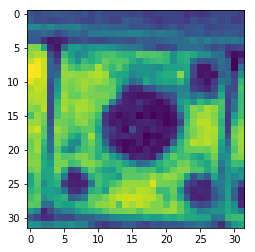

In [12]:
plt.imshow(X[0])

In [34]:
mask = np.isnan(training_regress)

In [35]:
regress_x = np.array(training_x)[~mask]

In [36]:
regress_y = np.array(training_regress)[~mask]

In [18]:
len(regress_y)

778

(array([98., 86., 81., 86., 54., 81., 61., 71., 80., 80.]),
 array([4.70829010e-03, 6.32456589e-01, 1.26020489e+00, 1.88795319e+00,
        2.51570148e+00, 3.14344978e+00, 3.77119808e+00, 4.39894638e+00,
        5.02669468e+00, 5.65444298e+00, 6.28219128e+00]),
 <a list of 10 Patch objects>)

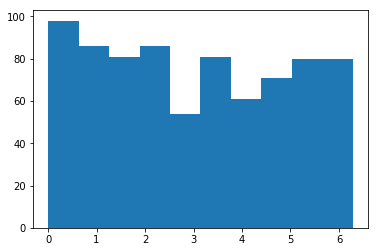

In [37]:
plt.hist(regress_y)